# Introduction to Eigen-decomposition

## Generate a "high" dimensional dataset

Let's generate 3 dimensional data, composed of 20 observations grouped in 3 clusters.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
blobs,clusters=make_blobs(n_samples=20,
                          n_features=3,
                          cluster_std=.2,
                          random_state=1)


Let's cheat and sort by cluster for better visualisation, but keep in mind that the order of the data does not matter for eigenvalue decomposition (usually clusters are not known at this step).

In [2]:
blobs=blobs[np.argsort(clusters),:]
clusters=clusters[np.argsort(clusters)]

## Plotting the data in its high dimensions

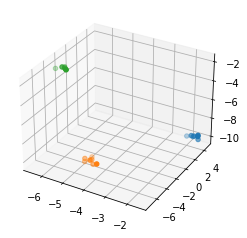

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, 
                     projection='3d')

for c in range(3):
    ax.scatter(blobs[clusters==c,0], 
               blobs[clusters==c,1], 
               blobs[clusters==c,2])

## Calculate covariance matrix

Before calculating the covariance matrix, let's scale the data to remove any magnitude effect, by calling `StandardScaler`, all features will have mean of 0 and standard deviation of 1.

In [4]:
from sklearn.preprocessing import *
                            
scaler = StandardScaler()
blobs_scaled = scaler.fit_transform(blobs)

The covariance between two variables $x$ and $y$ is calculated as following:

$$\sigma = \frac{1}{n-1}\sum_{i=1}^{n}\left ( x_{i} - \bar{x} \right )\left ( y_{i} - \bar{y} \right )$$

basically, a covariance matrix is all pairwise covariances of your observations, this will then lead to a square matrix of size n_obs by n_obs.

In [5]:
import numpy as np
cov = np.cov(blobs_scaled)

We can now plot the covariance matrix, the data looks quite structured, but this is because we have already grouped the observations into these clusters to facilitate visualisation!

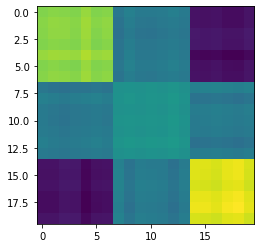

In [6]:
plt.imshow(cov);

We can see that the goup in the middle seem to share variance with the two other groups, this indicates that this cluster is in between the two other clusters in high dimensions.

## Eigen-decomposition

Now let's get serious, we will compute the eigenvalues and the eigenvectors of this covariance matrix:

$$cov = XDX^{-1}$$

Where $X$ is a matrix composed of **eigenvectors** and $D$ is a diagonal matrix (only vlues on the diagonal) composed of **eigenvalues**. No need to solve the equations by hand, we already got a nice numpy function to do this job :)

In [7]:
D,X = np.linalg.eigh(cov)

Let's plot the diagonal matrix $D$ of the eigenvalues, as you can see, `np.linalg.eigh` already sorted these by ascending scaling values, meaning that the most important ones are situated on the lower right corner.

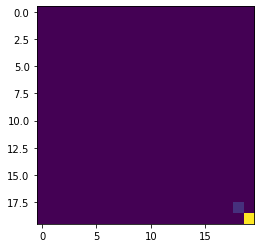

In [8]:
plt.imshow(np.diag(D));

Let's look at the eigenvectors, which are represented by each column, we can see that the two last on the right show quite structured patterns, that is because:
1. These are the two most informative dimensions
2. data is already ordered by cluster (yes we are cheating here!)

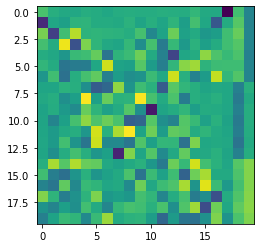

In [9]:
plt.imshow(X);

We can now select our informative dimensions, which is simply done by truncating the matrix $X$ and plotting the kept eigenvectors, here we keep only two dimensions, so we selected the two last columns of $X$:

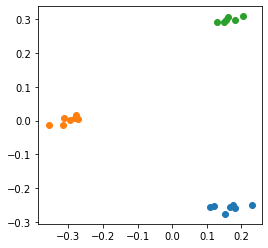

In [10]:
plt.figure(figsize=(4,4))
for c in range(3):
    plt.scatter(
        X[clusters==c,-2],
        X[clusters==c,-1])

### what kind of sorcery is this??

Using linear transformations, we basically just rotated the data to fit it on a 2D plane, with the eigenvectors being the "axes" or the "directions" of such transformations, the eigenvalues gives us a scale of the transformations. 